# Name:Sakshi
# The Spark Foundation GRIP July21
# Data Science & Business Analytics Intern at The Spark Foundation

## Task 3:Exploratory Data Analysis - Retail

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\ACER\Desktop\SampleSuperstore.csv")

## Understanding Data

In [4]:
dataset.head()#Showing the top 5 Rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
dataset.tail()#Showing the Bottom 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
dataset.shape
#Conclusioncon: There are 9994 Rows and 13 Columns

(9994, 13)

In [7]:
dataset.describe()
#Descirbing the Dataset

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Based on the Understanding of Data the Company Delivers Product accross 49 States

In [13]:
dataset.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [14]:
dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Cleaning the Data

In [16]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [17]:
retail = dataset.drop(['Postal Code', 'Country'], axis=1)

In [18]:
retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory Data Analysis (EDA)

In [19]:
# Grouping States By Profit as Max Value
retail_state_pmax = retail.groupby('State')[ 'Profit'].max().sort_values(ascending = False)
retail_state_pmax

State
Indiana                 8399.9760
Washington              6719.9808
Delaware                5039.9856
Michigan                4946.3700
Minnesota               4630.4755
New York                3919.9888
Georgia                 3177.4750
Virginia                2799.9840
Rhode Island            2591.9568
New Jersey              2365.9818
Missouri                2302.9671
California              1906.4850
Nevada                  1644.2913
Alabama                 1459.2000
Kentucky                1416.8000
Montana                 1379.9770
Maryland                1270.9900
Pennsylvania            1119.9968
Vermont                 1013.1270
Illinois                 874.9875
Arkansas                 843.1706
Nebraska                 743.9880
Wisconsin                673.8816
District of Columbia     648.5624
Texas                    624.9875
Ohio                     607.6080
Oklahoma                 523.7052
New Hampshire            517.4793
Massachusetts            503.7822
Utah    

<AxesSubplot:xlabel='State'>

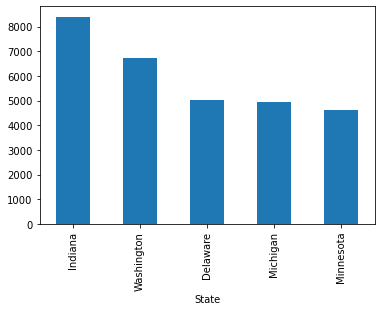

In [20]:
# Top 5 States With High Number Of Profit
retail_state_pmax[:5].plot(kind = 'bar')

<AxesSubplot:xlabel='State'>

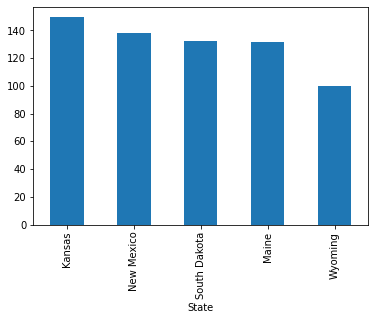

In [21]:
# Bottom 5 states with Least Number of Profit
retail_state_pmax[44:].plot(kind = 'bar')

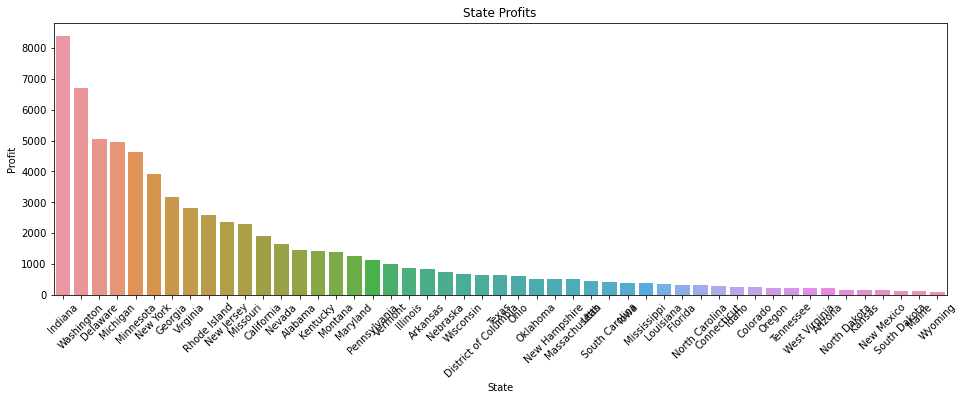

In [22]:
plt.figure(figsize=(16, 5))
sns.barplot(x = retail_state_pmax.index, y= retail_state_pmax.values)
plt.xticks(rotation = 45)
plt.ylabel('Profit')
plt.title("State Profits")
plt.show()

In [23]:
# Grouping States By Sales as Max Value
retail_state_smax = retail.groupby('State')['Sales'].max().sort_values(ascending = False)
retail_state_smax

State
Florida                 22638.480
Indiana                 17499.950
Washington              13999.960
New York                11199.968
Delaware                10499.970
Michigan                 9892.740
Minnesota                9449.950
New Jersey               9099.930
Virginia                 8749.950
Pennsylvania             8399.976
California               8187.650
Texas                    8159.952
North Carolina           7999.980
Georgia                  6354.950
Rhode Island             5399.910
Missouri                 4899.930
Nevada                   4535.976
Ohio                     4499.985
Vermont                  4404.900
Kentucky                 3080.000
Alabama                  3040.000
Montana                  2999.950
Wisconsin                2807.840
Illinois                 2799.960
Colorado                 2549.985
Maryland                 2541.980
Nebraska                 2479.960
Mississippi              2430.080
Tennessee                2314.116
New Hamp

<AxesSubplot:xlabel='State'>

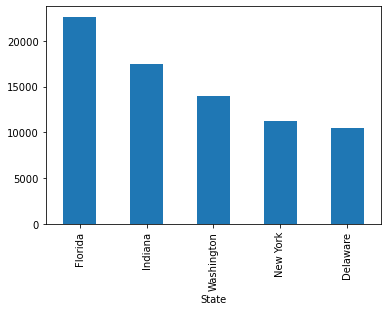

In [24]:
# Top 5 States With Highest Number Of Sales
retail_state_smax[:5].plot(kind = 'bar')

<AxesSubplot:xlabel='State'>

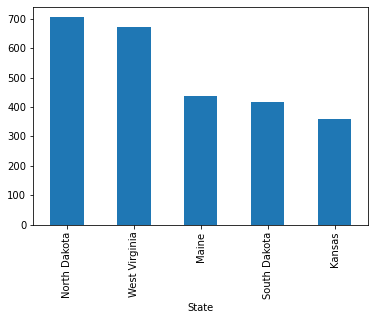

In [25]:
# Bottom 5 states with Least Number of sales
retail_state_smax[44:].plot(kind = 'bar')

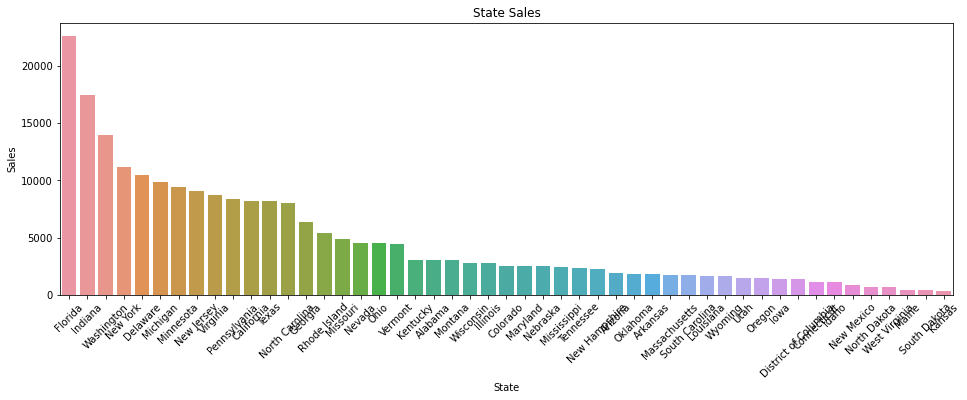

In [26]:
plt.figure(figsize=(16, 5))
sns.barplot(x = retail_state_smax.index, y= retail_state_smax.values)
plt.xticks(rotation = 45)
plt.ylabel('Sales')
plt.title("State Sales")
plt.show()

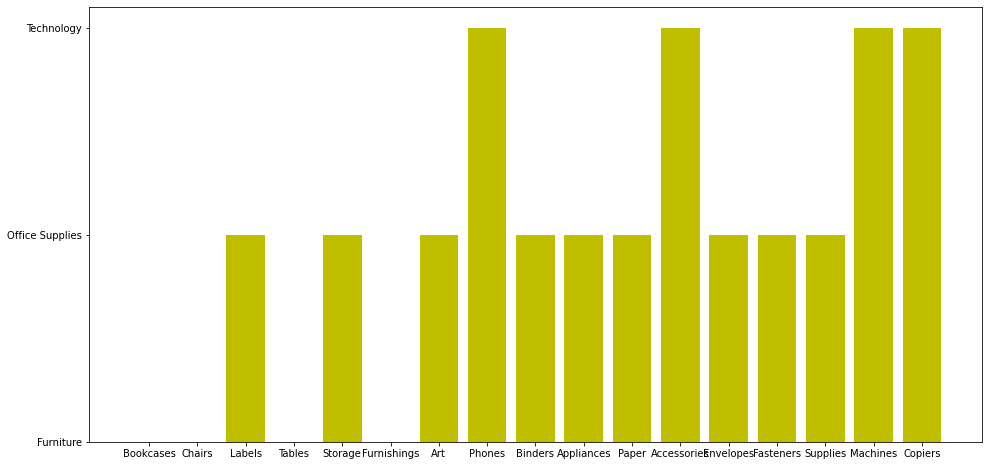

In [28]:
#sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=retail ,color='y')
plt.show()

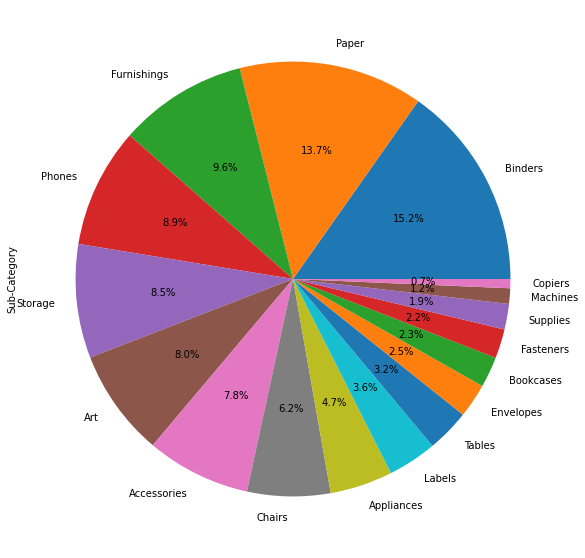

In [29]:
plt.figure(figsize=(12,10))
retail['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-30-389d32cdfa67>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retail.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


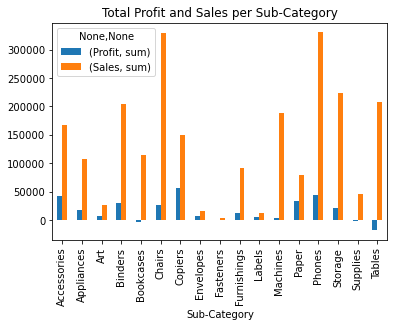

In [30]:
retail.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

In [31]:
# Grouping States by Numerical Data as Mean Value
retail_state_mean = retail.groupby(['State'])[['Profit', 'Sales', 'Discount', 'Quantity']].mean()
retail_state_mean

,Profit,Sales,Discount,Quantity
State,,,,
Alabama,94.865989,319.846557,0.000000,4.196721
Arizona,-15.303235,157.508933,0.303571,3.848214
Arkansas,66.811452,194.635500,0.000000,4.000000
California,38.171608,228.729451,0.072764,3.831584
Colorado,-35.867351,176.418231,0.316484,3.807692
Connecticut,42.823071,163.223866,0.007317,3.426829
Delaware,103.930988,285.948635,0.006250,3.822917
District of Columbia,105.958930,286.502000,0.000000,4.000000
Florida,-8.875461,233.612815,0.299347,3.600522


## Relationship Analysis With HeatMap

In [32]:
corelation = retail.corr()

<AxesSubplot:>

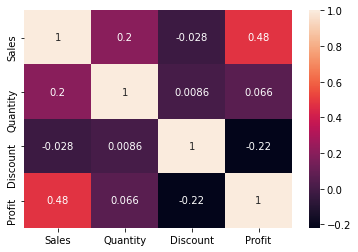

In [33]:
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels= corelation.columns, annot= True)

## Pairplots

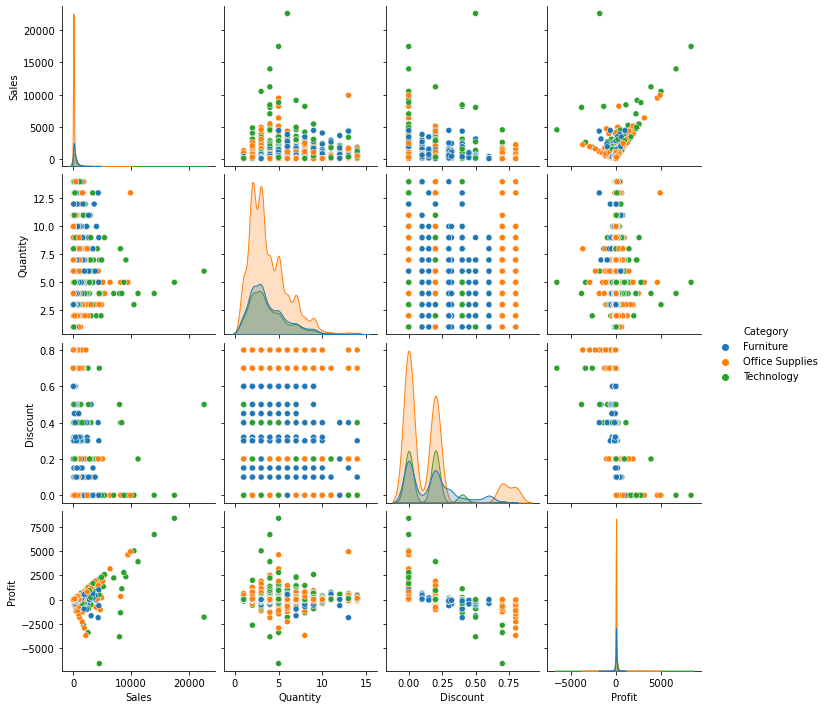

In [34]:
sns.pairplot(retail, hue='Category')
#Pairplot of hue Category

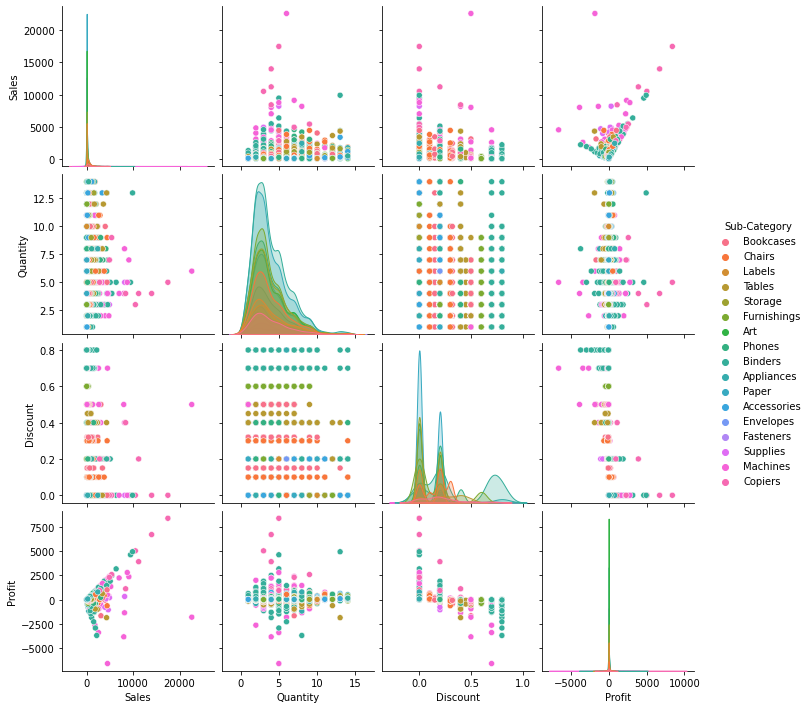

In [35]:
sns.pairplot(retail, hue='Sub-Category')
#Pairplot of hue Sub-Category

## CountPlot

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


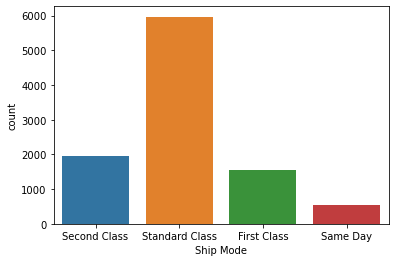

In [36]:
#Count Plot of Ship Mode
shipmode = sns.countplot("Ship Mode", data = retail)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


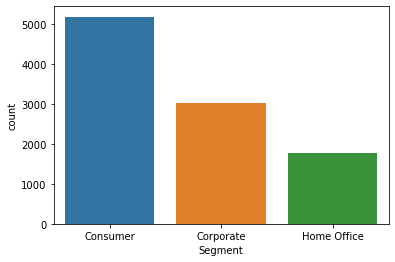

In [37]:
#Count Plot of Segment 
segment = sns.countplot("Segment", data = retail)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


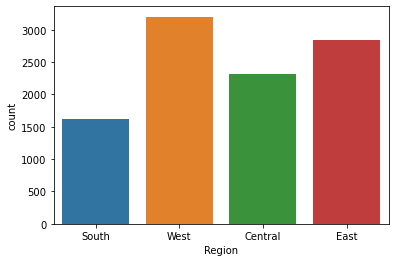

In [38]:
#Count Plot of Region
region = sns.countplot("Region", data = retail)

# Observation From EDA

## The weak areas where I can work to make more profit are
### To increase the same day delivery which will increase more sales and will result in more profit
### To reduce the sales of Bookcases and Tables because these Sub-Category are in loss
### To increase productivity in South Region